In [1]:
# Make code toggle-able for easier review.
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<i>The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a></i>.''')

# Project Setup from Thinkful

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import mstats

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.neural_network import MLPClassifier

%matplotlib inline

In [3]:
artworks = pd.read_csv('https://media.githubusercontent.com/media/MuseumofModernArt/collection/master/Artworks.csv')

In [4]:
artworks.columns

Index(['Title', 'Artist', 'ConstituentID', 'ArtistBio', 'Nationality',
       'BeginDate', 'EndDate', 'Gender', 'Date', 'Medium', 'Dimensions',
       'CreditLine', 'AccessionNumber', 'Classification', 'Department',
       'DateAcquired', 'Cataloged', 'ObjectID', 'URL', 'ThumbnailURL',
       'Circumference (cm)', 'Depth (cm)', 'Diameter (cm)', 'Height (cm)',
       'Length (cm)', 'Weight (kg)', 'Width (cm)', 'Seat Height (cm)',
       'Duration (sec.)'],
      dtype='object')

In [5]:
# Select Columns.
artworks = artworks[['Artist', 'Nationality', 'Gender', 'Date', 'Department',
                    'DateAcquired', 'URL', 'ThumbnailURL', 'Height (cm)', 'Width (cm)']]

# Convert URL's to booleans.
artworks['URL'] = artworks['URL'].notnull()
artworks['ThumbnailURL'] = artworks['ThumbnailURL'].notnull()

# Drop films and some other tricky rows.
artworks = artworks[artworks['Department']!='Film']
artworks = artworks[artworks['Department']!='Media and Performance Art']
artworks = artworks[artworks['Department']!='Fluxus Collection']

# Drop missing data.
artworks = artworks.dropna()

In [6]:
artworks['DateAcquired'] = pd.to_datetime(artworks.DateAcquired)
artworks['YearAcquired'] = artworks.DateAcquired.dt.year

### _Note: At this point in my reproduction of Thinkful's steps, I took a 20%-sized, random subsample of the data in order to speed up the rest of the calculations._

In [7]:
artworks = artworks.copy().sample(frac=0.20)

In [8]:
# Remove multiple nationalities, genders, and artists.
artworks.loc[artworks['Gender'].str.contains('\) \('), 'Gender'] = '\(multiple_persons\)'
artworks.loc[artworks['Nationality'].str.contains('\) \('), 'Nationality'] = '\(multiple_nationalities\)'
artworks.loc[artworks['Artist'].str.contains(','), 'Artist'] = 'Multiple_Artists'

# Convert dates to start date, cutting down number of distinct examples.
artworks['Date'] = pd.Series(artworks.Date.str.extract(
    '([0-9]{4})', expand=False))[:-1]

# Final column drops and NA drop.
X = artworks.drop(['Department', 'DateAcquired', 'Artist', 'Nationality', 'Date'], 1)

# Create dummies separately.
artists = pd.get_dummies(artworks.Artist)
nationalities = pd.get_dummies(artworks.Nationality)
dates = pd.get_dummies(artworks.Date)

# Concat with other variables, but artists slows this wayyyyy down so we'll keep it out for now
X = pd.get_dummies(X, sparse=True)
X = pd.concat([X, nationalities, dates], axis=1)

Y = artworks.Department

### Thinkful-provided model

In [9]:
# Alright! We've done our prep, let's build the model.
# Neural networks are hugely computationally intensive.
# This may take several minutes to run.

# Import the model.


# Establish and fit the model, with a single, 1000 perceptron layer.
mlp = MLPClassifier(hidden_layer_sizes=(1000,))
mlp.fit(X, Y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(1000,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [10]:
mlp.score(X, Y)

0.614780840701688

In [11]:
Y.value_counts()/len(Y)

Prints & Illustrated Books    0.524138
Photography                   0.223462
Architecture & Design         0.113670
Drawings                      0.104449
Painting & Sculpture          0.034281
Name: Department, dtype: float64

In [12]:
cross_val_score(mlp, X, Y, cv=5)

array([0.63743796, 0.53877069, 0.5820331 , 0.55839243, 0.31102176])

<hr>

# Dropping redundant features

In [13]:
pd.set_option('display.max_columns', 500)
X.head(3)

,URL,ThumbnailURL,Height (cm),Width (cm),YearAcquired,Gender_(),Gender_(Female),Gender_(Male),Gender_(male),Gender_\(multiple_persons\),(),(Albanian),(American),(Argentine),(Australian),(Austrian),(Bahamian),(Belgian),(Bolivian),(Bosnian),(Brazilian),(British),(Bulgarian),(Cambodian),(Cameroonian),(Canadian),(Chilean),(Chinese),(Colombian),(Costa Rican),(Croatian),(Cuban),(Czech),(Czechoslovakian),(Danish),(Dutch),(Ecuadorian),(Egyptian),(Ethiopian),(Finnish),(French),(Georgian),(German),(Greek),(Guatemalan),(Haitian),(Hungarian),(Icelandic),(Indian),(Iranian),(Irish),(Israeli),(Italian),(Ivorian),(Japanese),(Kenyan),(Korean),(Latvian),(Lebanese),(Lithuanian),(Luxembourgish),(Malaysian),(Malian),(Mexican),(Nationality Unknown),(Nationality unknown),(New Zealander),(Nigerian),(Norwegian),(Pakistani),(Palestinian),(Panamanian),(Peruvian),(Polish),(Portuguese),(Puerto Rican),(Romanian),(Russian),(Scottish),(Senegalese),(Singaporean),(Slovenian),(South African),(Spanish),(Sudanese),(Swedish),(Swiss),(Tanzanian),(Thai),(Tunisian),(Turkish),(Ukrainian),(Uruguayan),(Various),(Venezuelan),(Yugoslav),(Zimbabwean),\(multiple_nationalities\),1501,1797,1810,1816,1818,1825,1832,1837,1839,1840,1841,1843,1844,1845,1849,1850,1851,1852,1853,1854,1855,1856,1857,1858,1859,1860,1861,1862,1863,1864,1865,1866,1867,1868,1869,1870,1871,1872,1873,1874,1875,1876,1877,1878,1879,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898,1899,1900,1901,1902,1903,1904,1905,1906,1907,1908,1909,1910,1911,1912,1913,1914,1915,1916,1917,1918,1919,1920,1921,1922,1923,1924,1925,1926,1927,1928,1929,1930,1931,1932,1933,1934,1935,1936,1937,1938,1939,1940,1941,1942,1943,1944,1945,1946,1947,1948,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
63915,True,True,50.2,50.2,1992,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
123418,True,True,14.1,21.5,2014,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
25294,True,True,14.7,17.9,1964,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Right out the gate, some of these features are redundant. Together, Gender_(Female), Gender_(), & Gender_multiplepersons contain all of the variance for gender - 4 columns that say the same thing is sure to contribute to overfitting.

### In the same vein, we shouldn't keep YearAcquired – it's redundant with the dummy columns, and the MLP model won't be great at interpreting its scale as-is.

In [14]:
X2 = X.drop(['Gender_(Male)', 'Gender_(male)', 'YearAcquired'], axis=1)
X2.head(3)

,URL,ThumbnailURL,Height (cm),Width (cm),Gender_(),Gender_(Female),Gender_\(multiple_persons\),(),(Albanian),(American),(Argentine),(Australian),(Austrian),(Bahamian),(Belgian),(Bolivian),(Bosnian),(Brazilian),(British),(Bulgarian),(Cambodian),(Cameroonian),(Canadian),(Chilean),(Chinese),(Colombian),(Costa Rican),(Croatian),(Cuban),(Czech),(Czechoslovakian),(Danish),(Dutch),(Ecuadorian),(Egyptian),(Ethiopian),(Finnish),(French),(Georgian),(German),(Greek),(Guatemalan),(Haitian),(Hungarian),(Icelandic),(Indian),(Iranian),(Irish),(Israeli),(Italian),(Ivorian),(Japanese),(Kenyan),(Korean),(Latvian),(Lebanese),(Lithuanian),(Luxembourgish),(Malaysian),(Malian),(Mexican),(Nationality Unknown),(Nationality unknown),(New Zealander),(Nigerian),(Norwegian),(Pakistani),(Palestinian),(Panamanian),(Peruvian),(Polish),(Portuguese),(Puerto Rican),(Romanian),(Russian),(Scottish),(Senegalese),(Singaporean),(Slovenian),(South African),(Spanish),(Sudanese),(Swedish),(Swiss),(Tanzanian),(Thai),(Tunisian),(Turkish),(Ukrainian),(Uruguayan),(Various),(Venezuelan),(Yugoslav),(Zimbabwean),\(multiple_nationalities\),1501,1797,1810,1816,1818,1825,1832,1837,1839,1840,1841,1843,1844,1845,1849,1850,1851,1852,1853,1854,1855,1856,1857,1858,1859,1860,1861,1862,1863,1864,1865,1866,1867,1868,1869,1870,1871,1872,1873,1874,1875,1876,1877,1878,1879,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898,1899,1900,1901,1902,1903,1904,1905,1906,1907,1908,1909,1910,1911,1912,1913,1914,1915,1916,1917,1918,1919,1920,1921,1922,1923,1924,1925,1926,1927,1928,1929,1930,1931,1932,1933,1934,1935,1936,1937,1938,1939,1940,1941,1942,1943,1944,1945,1946,1947,1948,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
63915,True,True,50.2,50.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
123418,True,True,14.1,21.5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
25294,True,True,14.7,17.9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Let's see how that impacts the model...

In [15]:
# Test the altered data with the same MLP configuration used earlier in the assignment.
mlp2 = MLPClassifier(hidden_layer_sizes=(1000,))
mlp2.fit(X2, Y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(1000,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [16]:
mlp2.score(X2, Y)

0.7056598420729112

In [17]:
cross_val_score(mlp2, X2, Y, cv=5)

array([0.73812338, 0.68983452, 0.71985816, 0.69456265, 0.72989593])

### That's some pretty good lift already, and slightly more consistent across folds to boot. Nice!

<hr>

# Rescaling the data

### I'd like to rescale my features so that their variances are comparable - this should help improve the model's performance.

In [18]:
# Start with low-hanging fruit - change URL and Thumbnail URL from booleans to numbers
X2['URL'] = X2['URL'] * 1
X2['ThumbnailURL'] = X2['ThumbnailURL'] * 1

### Before I decide how to proceed with scaling my continuous variables (height & width), I'm going to check for the presence of outliers.

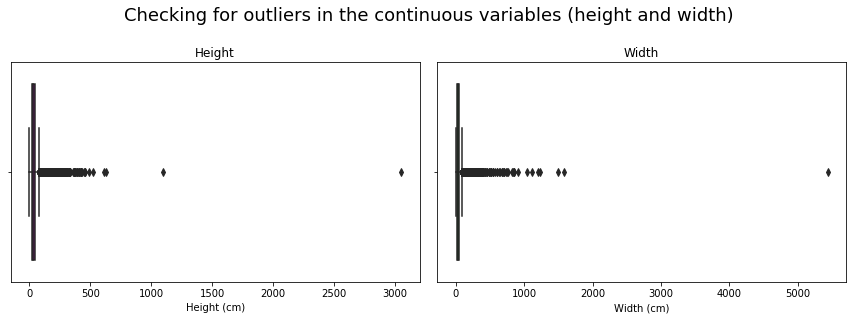

In [19]:
plt.figure(figsize=(12,4))
ax1 = plt.subplot(121)    
sns.boxplot(X2['Height (cm)'], color='purple')
plt.title('Height')

ax2 = plt.subplot(122)    
sns.boxplot(X2['Width (cm)'], color='green')
plt.title('Width')

plt.suptitle('Checking for outliers in the continuous variables (height and width)',
             y=1.1,
             fontsize=18)

plt.tight_layout()
plt.show()

### There are substantial outliers in both height and width. This makes a lot of sense given the dataset - some pieces in the MOMA's collection are huge. To proceed, I'm going to (1) log the data to bring the outliers a bit closer to the mean, (2) winsorizing away the outliers that remain, and (3) use SciPy's minmax scaler to transform the data to a 0-1 scale.

In [20]:
# A little bit of trial and error led me to the winsorizing cutoffs 
# they're the minimum cut-points that actually eliminate all of the outliers.    

# Width
X2['width_rescaled'] = X2['Width (cm)'].apply(lambda x: np.log(x))
X2['width_rescaled'] = mstats.winsorize(X2['width_rescaled'], limits=0.02)

# Height
X2['height_rescaled'] = X2['Height (cm)'].apply(lambda x: np.log(x))
X2['height_rescaled'] = mstats.winsorize(X2['height_rescaled'], limits=(0.03, 0.02))

# Finally, rescale the data
scaler = MinMaxScaler()
X2[['width_rescaled', 'height_rescaled']] = scaler.fit_transform(X2[['width_rescaled', 'height_rescaled']])

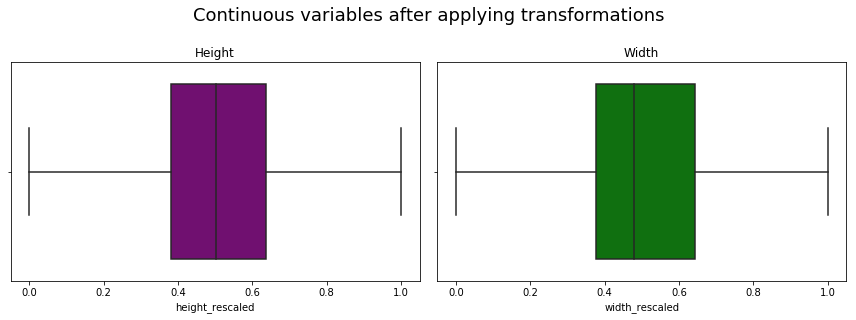

In [21]:
plt.figure(figsize=(12,4))
ax1 = plt.subplot(121)    
sns.boxplot(X2['height_rescaled'], color='purple')
plt.title('Height')

ax2 = plt.subplot(122)    
sns.boxplot(X2['width_rescaled'], color='green')
plt.title('Width')

plt.suptitle('Continuous variables after applying transformations',
             y=1.1,
             fontsize=18)

plt.tight_layout()
plt.show()

In [22]:
# Drop the now-redundant unscaled features & preview the data
X2.drop(['Height (cm)', 'Width (cm)'], 1, inplace=True)
X2.head(3)

,URL,ThumbnailURL,Gender_(),Gender_(Female),Gender_\(multiple_persons\),(),(Albanian),(American),(Argentine),(Australian),(Austrian),(Bahamian),(Belgian),(Bolivian),(Bosnian),(Brazilian),(British),(Bulgarian),(Cambodian),(Cameroonian),(Canadian),(Chilean),(Chinese),(Colombian),(Costa Rican),(Croatian),(Cuban),(Czech),(Czechoslovakian),(Danish),(Dutch),(Ecuadorian),(Egyptian),(Ethiopian),(Finnish),(French),(Georgian),(German),(Greek),(Guatemalan),(Haitian),(Hungarian),(Icelandic),(Indian),(Iranian),(Irish),(Israeli),(Italian),(Ivorian),(Japanese),(Kenyan),(Korean),(Latvian),(Lebanese),(Lithuanian),(Luxembourgish),(Malaysian),(Malian),(Mexican),(Nationality Unknown),(Nationality unknown),(New Zealander),(Nigerian),(Norwegian),(Pakistani),(Palestinian),(Panamanian),(Peruvian),(Polish),(Portuguese),(Puerto Rican),(Romanian),(Russian),(Scottish),(Senegalese),(Singaporean),(Slovenian),(South African),(Spanish),(Sudanese),(Swedish),(Swiss),(Tanzanian),(Thai),(Tunisian),(Turkish),(Ukrainian),(Uruguayan),(Various),(Venezuelan),(Yugoslav),(Zimbabwean),\(multiple_nationalities\),1501,1797,1810,1816,1818,1825,1832,1837,1839,1840,1841,1843,1844,1845,1849,1850,1851,1852,1853,1854,1855,1856,1857,1858,1859,1860,1861,1862,1863,1864,1865,1866,1867,1868,1869,1870,1871,1872,1873,1874,1875,1876,1877,1878,1879,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898,1899,1900,1901,1902,1903,1904,1905,1906,1907,1908,1909,1910,1911,1912,1913,1914,1915,1916,1917,1918,1919,1920,1921,1922,1923,1924,1925,1926,1927,1928,1929,1930,1931,1932,1933,1934,1935,1936,1937,1938,1939,1940,1941,1942,1943,1944,1945,1946,1947,1948,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,width_rescaled,height_rescaled
63915,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.680041,0.673499
123418,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.430039,0.300148
25294,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.376011,0.312400


### Testing the original model again

In [23]:
# Test the altered data with the same MLP configuration used earlier in the assignment.
mlp2 = MLPClassifier(hidden_layer_sizes=(1000,))
mlp2.fit(X2, Y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(1000,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [24]:
mlp2.score(X2, Y)

0.9164499503522625

In [25]:
cross_val_score(mlp2, X2, Y, cv=5)

array([0.74119593, 0.75484634, 0.756974  , 0.74917258, 0.74172185])

In [26]:
X2.head(3)

,URL,ThumbnailURL,Gender_(),Gender_(Female),Gender_\(multiple_persons\),(),(Albanian),(American),(Argentine),(Australian),(Austrian),(Bahamian),(Belgian),(Bolivian),(Bosnian),(Brazilian),(British),(Bulgarian),(Cambodian),(Cameroonian),(Canadian),(Chilean),(Chinese),(Colombian),(Costa Rican),(Croatian),(Cuban),(Czech),(Czechoslovakian),(Danish),(Dutch),(Ecuadorian),(Egyptian),(Ethiopian),(Finnish),(French),(Georgian),(German),(Greek),(Guatemalan),(Haitian),(Hungarian),(Icelandic),(Indian),(Iranian),(Irish),(Israeli),(Italian),(Ivorian),(Japanese),(Kenyan),(Korean),(Latvian),(Lebanese),(Lithuanian),(Luxembourgish),(Malaysian),(Malian),(Mexican),(Nationality Unknown),(Nationality unknown),(New Zealander),(Nigerian),(Norwegian),(Pakistani),(Palestinian),(Panamanian),(Peruvian),(Polish),(Portuguese),(Puerto Rican),(Romanian),(Russian),(Scottish),(Senegalese),(Singaporean),(Slovenian),(South African),(Spanish),(Sudanese),(Swedish),(Swiss),(Tanzanian),(Thai),(Tunisian),(Turkish),(Ukrainian),(Uruguayan),(Various),(Venezuelan),(Yugoslav),(Zimbabwean),\(multiple_nationalities\),1501,1797,1810,1816,1818,1825,1832,1837,1839,1840,1841,1843,1844,1845,1849,1850,1851,1852,1853,1854,1855,1856,1857,1858,1859,1860,1861,1862,1863,1864,1865,1866,1867,1868,1869,1870,1871,1872,1873,1874,1875,1876,1877,1878,1879,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898,1899,1900,1901,1902,1903,1904,1905,1906,1907,1908,1909,1910,1911,1912,1913,1914,1915,1916,1917,1918,1919,1920,1921,1922,1923,1924,1925,1926,1927,1928,1929,1930,1931,1932,1933,1934,1935,1936,1937,1938,1939,1940,1941,1942,1943,1944,1945,1946,1947,1948,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,width_rescaled,height_rescaled
63915,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.680041,0.673499
123418,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.430039,0.300148
25294,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.376011,0.312400


### Even better  – the variability across folds is down even more, and my accuracy score is up. I've reached the end of what I know to do to improve the data, so from here I'll tweak parameters on the model to try to eke out further improvements.

<hr>

# Tweaking parameters

### Hidden layers
__We haven't gotten much into the process behind choosing optimal parameters in this course. I found some useful guidelines, articles, and books referenced on Stack Exchange, though, and I'm saving them here for future reference.__
* <a href = "https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw">Stack Exchange: How to choose the number of hidden layers & nodes in a feedforward neural network?</a>
* <a href = "http://www.faqs.org/faqs/ai-faq/neural-nets/part1/preamble.html">comp.ai.neural-nets FAQ</a>
* <a href = "http://hagan.okstate.edu/NNDesign.pdf#page=469">Neural Network Design: 2nd Ed.</a>
* <a href = "https://www.solver.com/training-artificial-neural-network-intro">Training an Artificial Neural Network - Intro</a> [a blog post by a private company]


__The last link in particular offered some concrete and immediately accessible guidelines for designing neural nets. In general, parsimony seems critical to the process because excessive complexity has the potential to enable overfitting. For the sake of this assignment, I'm going to follow its guidelines and see where they take me.__

>Rule One: As the complexity in the relationship between the input data and the desired output increases, the number of the processing elements in the hidden layer should also increase.

__I don't know much about the relationship between the input data & the output. I imagine that it's fairly complex and that nearly every feature has some currently unknown relationship to the classification problem.__

> Rule Two: If the process being modeled is separable into multiple stages, then additional hidden layer(s) may be required. If the process is not separable into stages, then additional layers may simply enable memorization of the training set, and not a true general solution effective with other data.

__I also don't know much about the process through which the MOMA actually classifies its pieces, but I suspect that it's a single-step "I know a photograph/drawing/book when I see it"-type situation. More than one hidden layer might actually create issues with generalization to the data outside my sample, and I almost certainly certainly won't need more than a few. I'll try a few different numbers of hidden values and see at what point overfitting seems to become an issue.__

> <i>Rule Three: The amount of training data available sets an upper bound for the number of processing elements in the hidden layer(s). To calculate this upper bound, use the number of cases in the training data set and divide that number by the sum of the number of nodes in the input and output layers in the network. Then divide that result again by a scaling factor between five and ten. Larger scaling factors are used for relatively less noisy data. If you use too many artificial neurons the training set will be memorized. If that happens, generalization of the data will not occur, making the network useless on new data sets.</i>

#### Calculating the optimal number of neurons per hidden layer:

In [27]:
# Define a function that I can use to calculate optimal layer size
def layer_size(data):
    # Number of nodes in the input & output layers
    input_nodes = data.shape[1]
    output_nodes = 1
    total_nodes = input_nodes + output_nodes

    # I've put some work into dropping features that I know are contributing to noise in the data, but 
    # I have no reason to believe that the data is no longer noisy. I'm going to stick with a small scaling factor.
    scaling_factor = 5 

    # Finally, calculate the optimal number of layers .
    max_elements = round((data.shape[0] / total_nodes) / scaling_factor,0)
    print('The maximum advisable number of processing elements in each hidden layer is is {}'.format(max_elements))
    
layer_size(X2)

The maximum advisable number of processing elements in each hidden layer is is 15.0


#### Generating a list of tuples to use in gridsearch so that I can try several numbers of hidden layers:

In [29]:
max_elements = 15
max_hidden_layers = 5

hl_to_test = [(int(max_elements),)]
while len(hl_to_test) < max_hidden_layers:
    hl_to_test.append(hl_to_test[-1] + (int(max_elements),))
    
print(hl_to_test)

[(15,), (15, 15), (15, 15, 15), (15, 15, 15, 15), (15, 15, 15, 15, 15)]


### Regularization term
I played around with a range of lambda values and found that the bump in cross-validation scores from increasing it was fairly negligible. I think there are a lot of scenarios in which regularization would be a really critical part of preventing overfitting, but this doesn't seem to be one.

In [30]:
for alpha in [0.0001, 0.001, 0.01, 0.1]:
    mlp3 = MLPClassifier(hidden_layer_sizes=(16,16,), alpha=alpha)
    mlp3.fit(X2, Y)
    print('Lambda = {}'.format(alpha))
    print('Score: {}'.format(mlp3.score(X2, Y)))
    print('Cross-validation:\n{}\n'.format(cross_val_score(mlp3, X2, Y, cv=5)))

Lambda = 0.0001
Score: 0.7825901933897583
Cross-validation:
[0.71330655 0.71702128 0.71158392 0.7070922  0.70529801]

Lambda = 0.001
Score: 0.7737481677620691


/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Cross-validation:
[0.72370598 0.71749409 0.7141844  0.7179669  0.70056764]

Lambda = 0.01
Score: 0.7688779611329141
Cross-validation:
[0.72323328 0.71182033 0.71891253 0.71749409 0.70553453]

Lambda = 0.1
Score: 0.7586647122795404
Cross-validation:
[0.70976129 0.70378251 0.7108747  0.70094563 0.71523179]



### Activation functions & solvers
I'm still learning the performance differences between the range of solvers and activation functions available – I'm going to try all of them in grid search and learn from what comes out.

<hr>

# Testing parameter performances

In [31]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {
        'activation' : ['identity', 'logistic', 'tanh', 'relu'],
        'solver' : ['lbfgs', 'sgd', 'adam'],
        'hidden_layer_sizes': hl_to_test
    }
]


clf = GridSearchCV(MLPClassifier(), 
                   param_grid,
                   error_score=0.0,
                   cv=3,
                   scoring='accuracy').fit(X2,Y)


print("Best parameters set found on development set:")
print(clf.best_params_)

/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/ana

/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/ana

/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/ana

Best parameters set found on development set:
{'activation': 'tanh', 'hidden_layer_sizes': (15, 15, 15, 15), 'solver': 'adam'}


/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


### It's interesting to me that GridSearchCV returned the hyperbolic tan function as the ideal activation function given accuracy-based scoring, and I don't entirely understand what made it superior to the alternatives in this instance.

<hr>

# Final model

### I'd like to see how this model performs given the whole dataset (not just my 20% sample), so I'm reproducing it here.

In [32]:
# Read the raw data
artworks2 = pd.read_csv('https://media.githubusercontent.com/media/MuseumofModernArt/collection/master/Artworks.csv')

# Select Columns.
artworks2 = artworks2[['Artist', 'Nationality', 'Gender', 'Date', 'Department',
                       'DateAcquired', 'URL', 'ThumbnailURL', 'Height (cm)', 'Width (cm)']]

# Convert URLs to booleans.
artworks2['URL'] = artworks2['URL'].notnull() * 1
artworks2['ThumbnailURL'] = artworks2['ThumbnailURL'].notnull() * 1

# Drop films and some other tricky rows.
artworks2 = artworks2[artworks2['Department']!='Film']
artworks2 = artworks2[artworks2['Department']!='Media and Performance Art']
artworks2 = artworks2[artworks2['Department']!='Fluxus Collection']

# Drop missing data.
artworks2 = artworks2.dropna()

# Fix the dates
artworks2['DateAcquired'] = pd.to_datetime(artworks.DateAcquired)
artworks2['YearAcquired'] = artworks2.DateAcquired.dt.year

# Remove multiple nationalities, genders, and artists.
artworks2.loc[artworks2['Gender'].str.contains('\) \('), 'Gender'] = '\(multiple_persons\)'
artworks2.loc[artworks2['Nationality'].str.contains('\) \('), 'Nationality'] = '\(multiple_nationalities\)'
artworks2.loc[artworks2['Artist'].str.contains(','), 'Artist'] = 'Multiple_Artists'

# Convert dates to start date, cutting down number of distinct examples.
artworks2['Date'] = pd.Series(artworks.Date.str.extract(
    '([0-9]{4})', expand=False))[:-1]

# Final column drops and NA drop.
X3 = artworks2.drop(['Department', 'DateAcquired', 'Artist', 'Nationality', 'Date'], 1)

# Create dummies separately.
artists = pd.get_dummies(artworks2.Artist)
nationalities = pd.get_dummies(artworks2.Nationality)
dates = pd.get_dummies(artworks2.Date)

# Concat with other variables
X3 = pd.get_dummies(X3, sparse=True)
X3 = pd.concat([X3, nationalities, dates], axis=1)

Y3 = artworks2.Department

# Drop redundant columns
X3 = X3.drop(['Gender_(Male)', 'Gender_(male)', 'YearAcquired'], axis=1)
   
# Clean & rescale width & height

X3['width_rescaled'] = X3['Width (cm)'].apply(lambda x: np.log(x))
X3['width_rescaled'] = mstats.winsorize(X3['width_rescaled'], limits=0.02)

X3['height_rescaled'] = X3['Height (cm)'].apply(lambda x: np.log(x))
X3['height_rescaled'] = mstats.winsorize(X3['height_rescaled'], limits=(0.03, 0.02))

scaler = MinMaxScaler()
X3[['width_rescaled', 'height_rescaled']] = scaler.fit_transform(X3[['width_rescaled', 'height_rescaled']])

X3.drop(['Height (cm)', 'Width (cm)'], 1, inplace=True)

# Preview
print('{} observations in the dataset'.format(X3.shape[0]))
X3.head(3)

105745 observations in the dataset


,URL,ThumbnailURL,Gender_(),Gender_(Female),Gender_\(multiple_persons\),(),(Albanian),(Algerian),(American),(Argentine),(Australian),(Austrian),(Azerbaijani),(Bahamian),(Belgian),(Bolivian),(Bosnian),(Brazilian),(British),(Bulgarian),(Cambodian),(Cameroonian),(Canadian Inuit),(Canadian),(Chilean),(Chinese),(Colombian),(Congolese),(Costa Rican),(Croatian),(Cuban),(Czech),(Czechoslovakian),(Danish),(Dutch),(Ecuadorian),(Egyptian),(Estonian),(Ethiopian),(Finnish),(French),(Georgian),(German),"(German, born Iran)",(Ghanaian),(Greek),(Guatemalan),(Guyanese),(Haitian),(Hungarian),(Icelandic),(Indian),(Iranian),(Irish),(Israeli),(Italian),(Ivorian),(Japanese),(Kenyan),(Korean),(Kuwaiti),(Latvian),(Lebanese),(Lithuanian),(Luxembourgish),(Malaysian),(Malian),(Mexican),(Moroccan),(Namibian),(Nationality Unknown),(Nationality unknown),(New Zealander),(Nicaraguan),(Nigerian),(Norwegian),(Pakistani),(Palestinian),(Panamanian),(Paraguayan),(Peruvian),(Polish),(Portuguese),(Puerto Rican),(Romanian),(Russian),(Scottish),(Senegalese),(Serbian),(Singaporean),(Slovak),(Slovenian),(South African),(Spanish),(Sudanese),(Swedish),(Swiss),(Taiwanese),(Tanzanian),(Thai),(Tunisian),(Turkish),(Ugandan),(Ukrainian),(Uruguayan),(Various),(Venezuelan),(Yugoslav),(Zimbabwean),(nationality unknown),\(multiple_nationalities\),1501,1797,1810,1816,1818,1825,1832,1837,1839,1840,1841,1843,1844,1845,1849,1850,1851,1852,1853,1854,1855,1856,1857,1858,1859,1860,1861,1862,1863,1864,1865,1866,1867,1868,1869,1870,1871,1872,1873,1874,1875,1876,1877,1878,1879,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898,1899,1900,1901,1902,1903,1904,1905,1906,1907,1908,1909,1910,1911,1912,1913,1914,1915,1916,1917,1918,1919,1920,1921,1922,1923,1924,1925,1926,1927,1928,1929,1930,1931,1932,1933,1934,1935,1936,1937,1938,1939,1940,1941,1942,1943,1944,1945,1946,1947,1948,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,width_rescaled,height_rescaled
0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.000000,0.663975
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.526081,0.611386
2,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [33]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X3, Y3, test_size=0.1)

### Final model

##### Recalculate layer sizes

In [40]:
layer_size(X3)

The maximum advisable number of processing elements in each hidden layer is is 71.0


###### Instantiate and fit the model

In [41]:
mlp4 = MLPClassifier(activation='tanh',
                     hidden_layer_sizes=(72,72,72,72,), 
                     solver='adam')
mlp4.fit(X_train, y_train)

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(72, 72, 72, 72), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

### Evaluating performance

##### Training set

In [42]:
print('Score: {}'.format(mlp4.score(X_train, y_train)))
print('Cross-validation:\n{}\n'.format(cross_val_score(mlp4, X_train, y_train, cv=5)))

Score: 0.7907533886729011


/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Cross-validation:
[0.71523875 0.71367027 0.71267206 0.72111596 0.71395544]



##### Test set

In [43]:
print('Score: {}'.format(round(mlp4.score(X_test, y_test),2)))

Score: 0.72


### Crosstabs & accuracy by department

In [44]:
crosstabs = pd.crosstab(mlp4.predict(X3), Y3, margins=True)[:5]
crosstabs

Department,Architecture & Design,Drawings,Painting & Sculpture,Photography,Prints & Illustrated Books,All
row_0,,,,,,
Architecture & Design,8477,536,362,340,1300,11015
Drawings,676,5523,337,619,1852,9007
Painting & Sculpture,199,304,2073,99,210,2885
Photography,469,818,133,18394,3375,23189
Prints & Illustrated Books,2152,3788,667,4644,48398,59649


In [45]:
# Summarize performance by department
for department in crosstabs.index:
    correct = crosstabs[crosstabs.index == department][department][0]
    total = crosstabs[crosstabs.index == department]['All'][0]
    print('{}: {}% accurate'.format(department,(round(correct/total, 2)*100)))

Architecture & Design: 77.0% accurate
Drawings: 61.0% accurate
Painting & Sculpture: 72.0% accurate
Photography: 79.0% accurate
Prints & Illustrated Books: 81.0% accurate


### All told, I'm pretty happy with this model. It's reasonably accurate, consistent across folds, and generalizable. As an extension of the project, it would be interesting to drill down on why it's so much better at designating pieces for certain departments than for others.

<hr>

# Conclusions & observations
The biggest improvement in the model's performance came from fixing the data up. Tweaking the model's parameters gave me a little bump, but mostly helped cut down on overfitting. There are a lot of factors to take into account when designing a neural net & a lot of parameters to play with. This is clearly a very involved process that I'm going to have to practice a lot to master. 


### Things to learn
* Why did my model fail to converge in cross-validation? Is it because the folds didn't have enough data to work with?
* Better ways to set a number of hidden layers than brute-forcing a range of them -- that's so slow!
* How to optimize learning rate.
* What scenarios each activation function is best for.